In [1]:
with open('./data/input_15.txt') as fh:
    file_input = fh.read().strip()

In [66]:
from intcode import intcode
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [169]:
def render_map(m):
    x = np.array([e[0] for e in m.keys()])
    y = np.array([e[1] for e in m.keys()])
    
    _minx, _maxx = x.min(), x.max()
    _miny, _maxy = y.min(), y.max()
    dimx = _maxx - _minx
    dimy = _maxy - _miny
    f = np.zeros((dimx+1, dimy+1)) -1
    
    for e in m:
        f[e[0]-_minx, e[1]-_miny] = m[e]
    f[-_minx, -_miny] = 3
    return plt.imshow(f.T)
    

In [170]:
mem = [int(d) for d in file_input.split(',')]

In [108]:
def ngb(pos):
    yield (pos[0], pos[1]-1), 1
    yield (pos[0], pos[1]+1), 2
    yield (pos[0]-1, pos[1]), 3
    yield (pos[0]+1, pos[1]), 4
    
def add_pos(pos, direction):
    if direction == 1:
        return pos[0], pos[1] - 1
    if direction == 2:
        return pos[0], pos[1] + 1
    if direction == 3:
        return pos[0] - 1, pos[1]
    if direction == 4:
        return pos[0] + 1, pos[1]
    
def opp(direction):
    return {
        1: 2,
        2: 1,
        3: 4,
        4: 3,
    }[direction] 

In [162]:
class robot():
    def __init__(self, mem, part2=False):
        self.reset = part2
        self._move = []
        self._outp = []
        
        self.ic = intcode(mem, take_input=self._move.pop, give_output=self._outp.append, add_mem = 1000)
        self.pos = (0, 0)
        self.map = {(0, 0): 1}
        self.dist = {(0, 0): 0}
        self.to_explore = set([n[0] for n in nbg(self.pos)])
        self.pos_ox = None
        self.save_state = None
    
    def _process(self, outp):
        pass
    
    def _walk(self, target):
        pass
    
    def _go(self, direction):
        self._move.append(direction)
        self.rc = self.ic.run()
        if self._outp.pop():
            self.pos = add_pos(self.pos, direction)
        else:
            raise("something went wrong")
    
    def _try(self, direction):
#         print(self.pos, direction, self.to_explore)
        self._move.append(direction)
        self.rc = self.ic.run()
        res = self._outp.pop()
        new_pos = add_pos(self.pos, direction)
#         print(new_pos)
        if res == 0:
            self.map[new_pos] = 0
        else:
            self.map[new_pos] = res
            if new_pos in self.dist:
                self.dist[new_pos] = min(self.dist[new_pos], self.dist[self.pos] + 1)
            else:
                self.dist[new_pos] = self.dist[self.pos] + 1
            self.pos = new_pos
            if res == 2:
                self.pos_ox = self.pos
                self.save_state = ic.__getstate__()
                if self.reset:
                    self.pos = (0, 0)
                    self.map = {(0, 0): 1}
                    self.dist = {(0, 0): 0}
                    self.path = []
                    new_pos = self.pos
            for n, d in ngb(new_pos):
                if n not in self.map.keys():
                    self.to_explore.add(n)
        return res
        
    
    def explore(self):
        self.path = []
        while self.to_explore:
            for n, d in ngb(self.pos):
                if n in self.to_explore:
                    self.to_explore.discard(n)
                    if self._try(d):
                        self.path.append(d)
                    break
            else:
                if self.path:
                    self._go(opp(self.path.pop()))
                else:
                    break

    def back_track():
        pass        
    
    def astar(self, target):
        pass

In [163]:
rob = robot(mem)
rob.explore()

saving


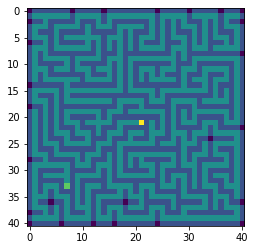

In [171]:
render_map(rob.map)

In [165]:
# part 1
rob.dist[rob.pos_ox]

258

In [166]:
# part 2
rob2 = robot(mem, part2 = True)
rob2.explore()

saving


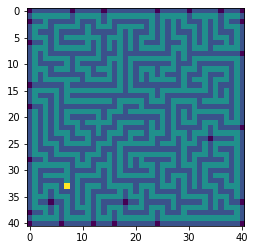

In [172]:
render_map(rob2.map)

In [176]:
max(rob2.dist.values())

372

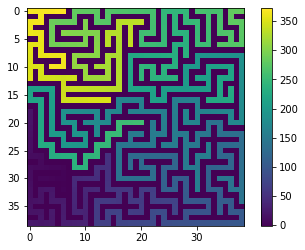

In [181]:
render_map(rob2.dist)
plt.colorbar()

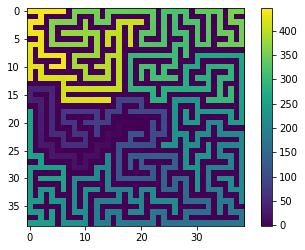

In [180]:
render_map(rob.dist)
plt.colorbar()

In [182]:
import networkx

ModuleNotFoundError: No module named 'networkx'